___
# Ciência dos Dados - PROJETO 2

___
## Nome 1 João Pedro Montefeltro Junqueira Meirelles

## Nome 2 Ester dos Santos Quintino

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as jeca
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\1513 IRON\Desktop\insper\Semestre 2 DP\Ciencia dos Dados\CDDP-P2


In [3]:
dados = pd.read_excel('spamham.xlsx')

In [4]:
num = dados.Email.count()

##### Sepraração dps da limpeza

___
## 3. Classificador Naive-Bayes

In [5]:
#limpeza
arranca = [':','!','?',',','"','/',';','.','-','_','=','+','(',')','*','@','#','$','%','§','&']
for i in range(num):
    dados.Email[i:i+1] = dados.Email[i:i+1].str.replace('  ',' ')
    for j in arranca:
        dados.Email[i:i+1] = dados.Email[i:i+1].str.replace(j,'')

dados.Email

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I don't think he goes to usf he lives arou...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me T...
7       As per your request 'Melle Melle Oru Minnaminu...
8       WINNER As a valued network customer you have b...
9       Had your mobile 11 months or more U R entitled...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH From 100 to 20000 poun...
12      URGENT You have won a 1 week FREE membership i...
13      I've been searching for the right words to tha...
14                      I HAVE A DATE ON SUNDAY WITH WILL
15      XXXMobileMovieClub To use your credit click th...
16                                  Oh ki'm watching here
17      Eh u r

In [6]:
dados_treino = dados.loc[:4179]
dados_teste = dados.loc[4180:num]

dados_teste = dados_teste.Email.values

Spam = dados_treino.Email[dados_treino.Class == 'spam'].values
Ham = dados_treino.Email[dados_treino.Class == 'ham'].values

Pspam = (dados_treino.Email[dados_treino.Class == 'spam'].count()/dados_treino.Email.count())*100
Pham = (dados_treino.Email[dados_treino.Class == 'ham'].count()/dados_treino.Email.count())*100

Pspam + Pham

99.97606510292006

In [7]:
spam_words = []
ham_words = []
i = 0
while i < len(Spam):
    word = Spam[i].split()
    for j in word:
        spam_words.append(j)
    i+=1

In [8]:
for i in Ham:
    i = str(i)
    word = i.split()
    for j in word:
        ham_words.append(j)

In [9]:
spam_dic = {}
for i in spam_words:
    n = 1
    for j in spam_words:
        if i == j:
            n += 1
        else:
            pass
    spam_dic[i] = n/len(spam_words)
ham_dic = {}
for i in ham_words:
    n = 1
    for j in ham_words:
        if i == j:
            n += 1
        else:
            pass
    ham_dic[i] = n/len(ham_words)

In [10]:
spam_dic

{'Free': 0.002770290506139563,
 'entry': 0.0015723270440251573,
 'in': 0.0041928721174004195,
 '2': 0.009958071278825996,
 'a': 0.020589997005091346,
 'wkly': 0.0004492362982929021,
 'comp': 0.0005989817310572028,
 'to': 0.03533992213237496,
 'win': 0.0017969451931716084,
 'FA': 0.00037436358191075174,
 'Cup': 0.0002994908655286014,
 'final': 0.0007487271638215035,
 'tkts': 0.00037436358191075174,
 '21st': 0.00022461814914645105,
 'May': 0.00022461814914645105,
 '2005': 0.0002994908655286014,
 'Text': 0.0020215633423180594,
 '87121': 0.0002994908655286014,
 'receive': 0.001722072476789458,
 'questionstd': 0.00022461814914645105,
 'txt': 0.003968253968253968,
 "rateTC's": 0.00022461814914645105,
 'apply': 0.0015723270440251573,
 "08452810075over18's": 0.00022461814914645105,
 'FreeMsg': 0.0005989817310572028,
 'Hey': 0.0004492362982929021,
 'there': 0.0006738544474393531,
 'darling': 0.00022461814914645105,
 "it's": 0.00022461814914645105,
 'been': 0.0024707996406109615,
 '3': 0.0011230

In [26]:
def classificando(emails,spam,ham):
    classificados = {}
    probabilidades = []
    for emailss in emails:
        p = 0
        email = emailss.split()
        for w in email:
            if w in spam:
                p += spam[w]
            if w in ham:
                p -= ham[w]
        probabilidades.append(p)
        if p > 0:
            classificados[emailss] = 'spam'
        elif p <= 0:
            classificados[emailss] = 'ham'
        else:
            pass
    return classificados, probabilidades

In [12]:
teste = []
for i in dados_teste:
    teste.append(i)
dados_teste = teste

In [29]:
tudo_certo, p = classificando(dados_teste,spam_dic,ham_dic)

In [14]:
results = []
for i in dados_teste:
    results.append(tudo_certo[i])

In [15]:
df = pd.DataFrame({
    'Class' : results,
    'Emails' : dados_teste
})

In [16]:
dados_reais = dados.loc[4180:num]

In [17]:
df.head()

,Class,Emails
0,ham,Can Ì send me a copy of da report
1,ham,swhrt how u deyhope ur ok tot about u 2daylove...
2,ham,Ok da i already planned I wil pick you
3,spam,Urgent Please call 0906346330 Your ABTA compli...
4,ham,Sorry I'll call later in meeting


In [18]:
dados_reais.head()

,Email,Class
4180,Can Ì send me a copy of da report,ham
4181,swhrt how u deyhope ur ok tot about u 2daylove...,ham
4182,Ok da i already planned I wil pick you,ham
4183,Urgent Please call 0906346330 Your ABTA compli...,spam
4184,Sorry I'll call later in meeting,ham


In [19]:
def comparar(reais,sol):
    certo_spam = 0 #Era SPAM e o bot acertou
    certo_ham = 0 #Era HAM e o bot acertou
    errado_spam =  0 #Era SPAM e o bot errou
    errado_ham = 0 #Era HAM e o bot errou
    n = 0
    for i in reais.Class:
        for j in sol.Class:
            if i == 'spam' and i == j:
                certo_spam += 1
            elif i == 'ham' and i == j:
                certo_ham += 1
            elif i == 'spam' and i != j:
                errado_spam += 1
            elif i == 'ham' and i != j:
                errado_ham += 1
            else:
                pass
    p_spam_certo = certo_spam/len(reais.Class[reais.Class == 'spam'])
    p_spam_errado = errado_spam/len(reais.Class[reais.Class == 'spam'])
    p_ham_certo = certo_ham/len(reais.Class[reais.Class == 'spam'])
    p_ham_errado = errado_ham/len(reais.Class[reais.Class == 'spam'])
    
    return p_spam_certo,p_spam_errado,p_ham_certo,p_ham_errado

In [20]:
comparar(dados_reais,df)

(384.0, 1010.0, 6725.934065934066, 2557.186813186813)

In [21]:
for i in range(len(dados_reais)):
    print(str(dados_reais.Class[i:i+1].values) + ',' + str(df.Class[i:i+1].values))
    if dados_reais.Class[i:i+1].values == df.Class[i:i+1].values:
        print('True')
    elif dados_reais.Class[i:i+1].values != df.Class[i:i+1].values:
        print('False')

['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['spam']
False
['spam'],['spam']
True
['spam'],['spam']
True
['spam'],['ham']
False
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['spam']
False
['

False
['ham'],['ham']
True
['spam'],['spam']
True
['spam'],['spam']
True
['ham'],['spam']
False
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['spam'],['spam']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['spam']
False
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
True
['ham'],['ham']
True
['ham'],['ham']
True
['spam'],['spam']
True
['ham'],['ham']
T

___
## 4. Curva ROC

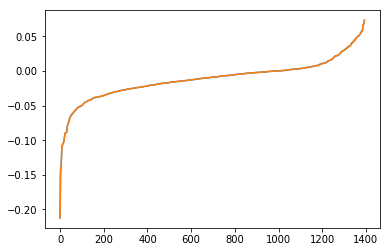

In [39]:
jeca.plot(p)
jeca.show()

___
## 5. Qualidade do Classificador alterando a base de treinamento